<a href="https://colab.research.google.com/github/ManasCode-sketch/Vehicle-Insurance/blob/main/Vehicle_Insurance2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/Vehicle_Insurance.csv")

In [ ]:
# Removing the Id column as it is not useful for analysis
df.drop("id", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


>**Insights from the preview (info) :-**
* **Dataset Size:** The DataFrame has 381,109 entries (rows) and 12 columns.
* **No Missing Values:** Every column shows 381109 non-null, which matches the total number of entries.This indicates that there are no missing values in this dataset.



In [ ]:
# Turning the response from Binary (1/0) to Yes/No
df["Response"] = df['Response'].replace({1:"Yes", 0:"No"})
# Also turning the binary (1/0) of previously insured column to True/False
df["Previously_Insured"] = df['Previously_Insured'].replace({1:True, 0:False})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  bool   
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 29.4+ MB


<ipython-input-3-9ff62cfa38d2>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Previously_Insured"] = df['Previously_Insured'].replace({1:True, 0:False})


### Descriptive analysis

In [ ]:
df.describe()

,Age,Driving_License,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,30564.389581,112.034295,154.347397
std,15.511611,0.046110,13.229888,17213.155057,54.203995,83.671304
min,20.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,24405.000000,29.000000,82.000000
50%,36.000000,1.000000,28.000000,31669.000000,133.000000,154.000000
75%,49.000000,1.000000,35.000000,39400.000000,152.000000,227.000000
max,85.000000,1.000000,52.000000,540165.000000,163.000000,299.000000


> **Dataset Size & Completeness:**

  * There a total of **381,109** records in the datset for these numerical columns.
  * The count is same for all numerical column which indicates **no missing value** in these datset columns.

> **Age Distribution:**

  * The average age is approximately **38.8 years**.
  * The range of age is covered from **20 to 85 years**.
  * The standard deviation (**15.5**) is relatively high compared to the mean which indicates the **significant** change in age.
  * The median age (**50th percentile**) is **39** which is slightly close to the mean and indicates the **symmetrical distribution**, may be slighty skewed towars young age (By looking at the 75th percentile of descriptive measure).

>**Driving License Ownership:**

  * This column is likely binary (0 or 1). The mean (**0.997869**) is very close to 1.
  * This indicates that an overwhelming majority of individuals in the dataset (around **99.78%**) have a driving license (As 1 represents having a license).

>Previously Insured Status:

  * This is also a **binary column (0 or 1)**. The mean (**0.458210**) suggests that about 45.8% of individuals were previously insured (1:True, 0:False). Conversely, approximately **54.2%** were not previously insured.
  * The median (50th percentile) is 0, and the 75th percentile is 1, indicating that less than 50% of the population is previously insured.
> Annual Premium:

  * The average annual premium is approximately **30,564**.
  * Premiums vary significantly, with a standard deviation of around **17,213**.
  * The range is vast, from a minimum of **2,630** to a maximum of **540,165**. This wide range and high maximum there are luxury cars inculded in the annual premium data.
  * The median premium (**31,669**) is very close to the mean, but the extremely high max compared to the 75th percentile (**39,400**) points to a potential right skew caused by very high premium values.
  
> Vintage (Customer Tenure):

  * Vintage likely represents the number of days the customer has been associated.
  * The range is from **10 to 299 days**.
  * The average vintage is approximately **154 days**.
  * The standard deviation (**83.6 days**) indicates a considerable spread in how long customers have been with the company. The distribution appears relatively symmetrical, with the median (**154**) being very close to the mean.

> Response (Target Variable):
  
  * This is a binary variable (0 or 1), likely indicating whether a customer responded positively (e.g., bought the insurance).

  * The mean (0.122563) is very low, indicating that only about 12.26% of the individuals in the dataset provided a positive response (assuming 1 is a positive response).

  * The median (0) and 75th percentile (0) reinforce this, showing that the majority of the dataset consists of non-responders. This highlights a significant class imbalance, where the positive class (Response = 1) is much smaller than the negative class (Response = 0). This is a crucial observation for modeling efforts.

<Axes: >

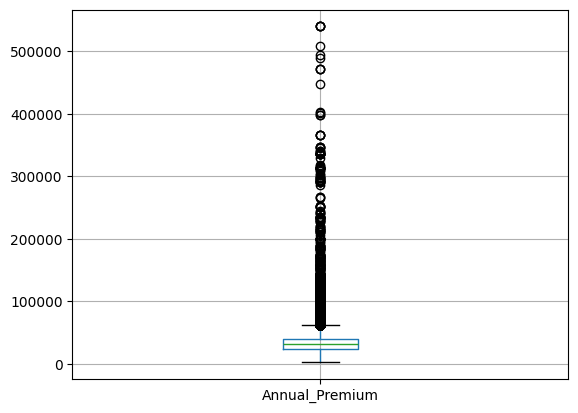

In [ ]:
# Checking if the Annual_Premium have outliers or there are costumers with high Annual_premium
df.boxplot(column=("Annual_Premium"))

### Correlation Between the columns

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

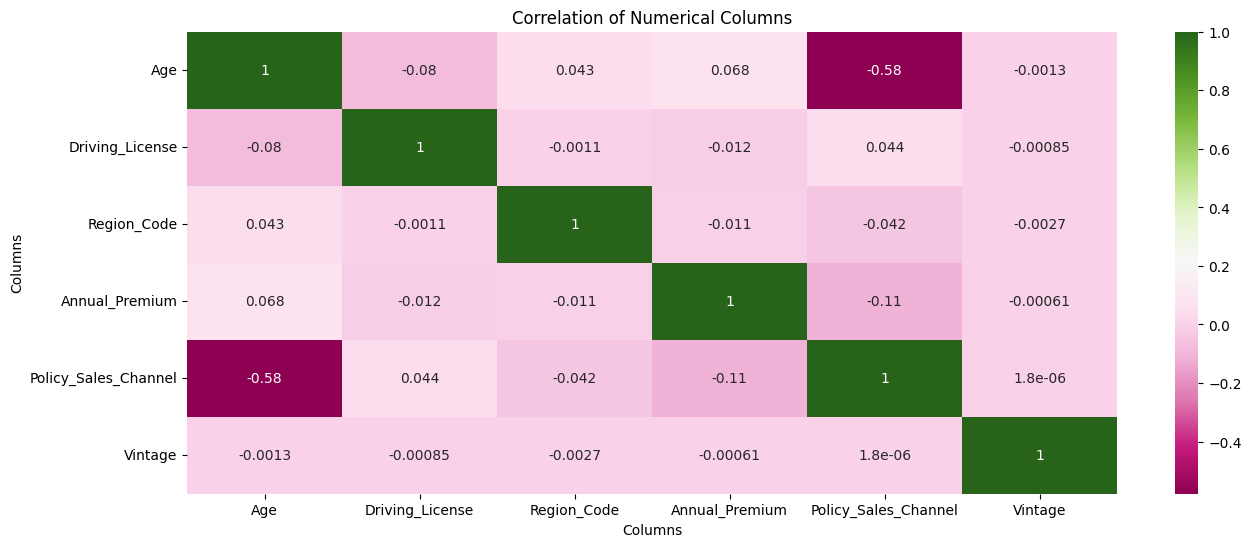

In [ ]:

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Set the figure size
plt.figure(figsize=(15, 6))

# Creating a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')

# Adding titles and labels
plt.title("Correlation of Numerical Columns")
plt.xlabel("Columns")
plt.ylabel("Columns")

# ploting the Graph
plt.show()

>**Relationship between Age, Policy Sales Channel, and Response:**
  
* There is a **moderate negative correlation (-0.58)** between Age and Policy_Sales_Channel. This suggests that **older customers tend not to be associated with policy sales channels**.

* Both Age (0.11) and Policy_Sales_Channel (-0.14) show **weak correlations with the target variable, Response**. This indicates that, individually, neither the customer's age nor their assigned policy sales channel number has a strong linear relationship with their likelihood of responding to the offer.

* Age also has a **weak negative correlation (-0.25)** with Previously_Insured, meaning older customers are slightly less likely to not be previously insured (i.e., more likely to have been previously insured).

>**Variables with Negligible Correlations:**


* Several variables, namely **Driving_License (e.g., 0.01 with Response), Region_Code (e.g., 0.011 with Response)**, and Vintage (e.g., -0.0011 with Response), show correlations very close to zero with most other columns, including the target variable, Response. This indicates they have **negligible linear relationships** with the other features in this dataset.

* **Annual_Premium** also exhibits generally very weak correlations (e.g., 0.023 with Response), with the slight exception of a weak negative correlation (-0.11) with Policy_Sales_Channel. Overall, its linear relationship with most other variables is very weak or negligible.

>Relationship between Previously Insured and Response/Policy Sales Channel:

* Previously_Insured has a moderate negative correlation (-0.34) with the target variable, Response. This is a significant finding, indicating that customers who have been previously insured are moderately less likely to respond to the current offer compared to those who have not.

* Previously_Insured also shows a weak positive correlation (0.22) with Policy_Sales_Channel, suggesting that previously insured customers might be slightly more associated with certain (higher-numbered) sales channels.




# **Graphical representing analaysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  bool   
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 29.4+ MB


 ### **Response Distribution by Gender**

In [ ]:
# Group the data by gender and response and get the counts
response_by_gender = df.groupby(['Gender', 'Response'])['Response'].count().unstack()
response_by_gender

Response,No,Yes
Gender,,
Female,156835,18185
Male,177564,28525


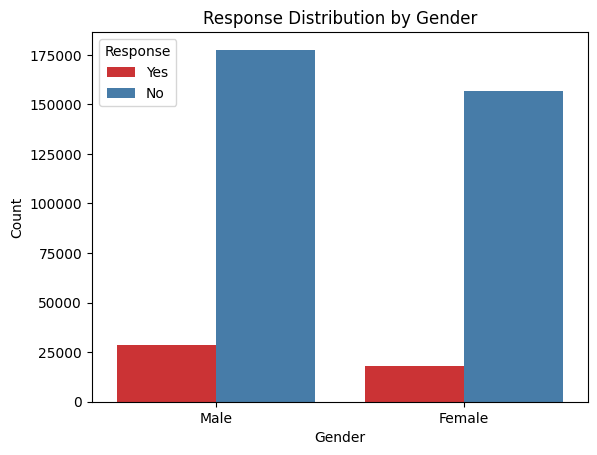

In [ ]:

# Create a bar plot using Seaborn
sns.countplot(x='Gender', hue='Response', data=df, palette="Set1")
plt.title('Response Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### **Annual premium Distribution by Age**




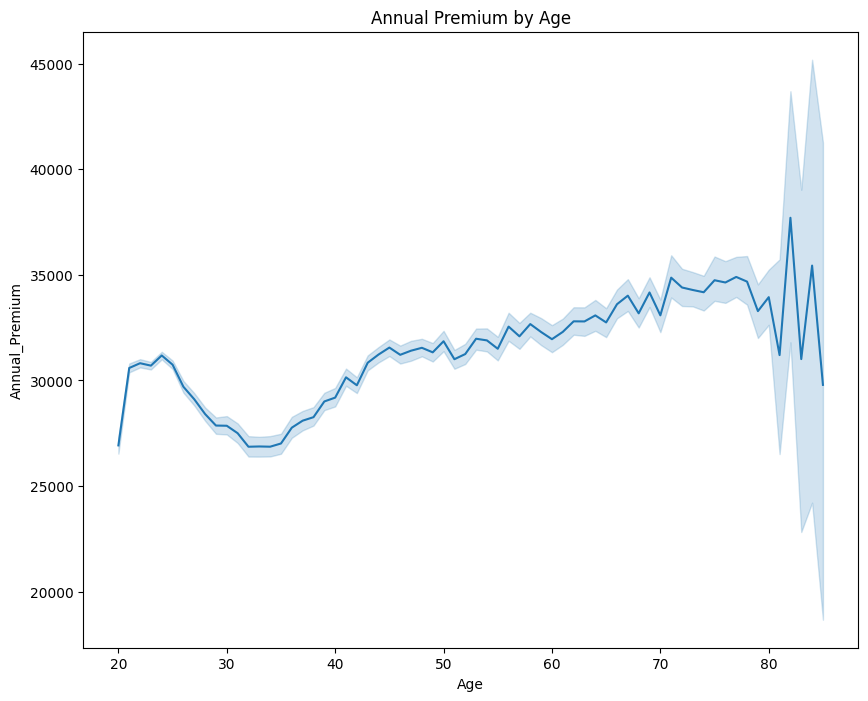

In [ ]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=df, x="Age", y="Annual_Premium")
plt.title("Annual Premium by Age")
plt.show()
plt.show()

### **Ploting previously Insured People Counts**

In [ ]:
# Group the data by gender and Previously Insured and get the counts
Count_by_gender = df.groupby(['Gender', 'Previously_Insured'])['Previously_Insured'].count().unstack()
Count_by_gender

Previously_Insured,False,True
Gender,,
Female,87071,87949
Male,119410,86679


<ipython-input-17-e4966ff68464>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(x="Gender", hue="Previously_Insured", data=df, color="skyblue")


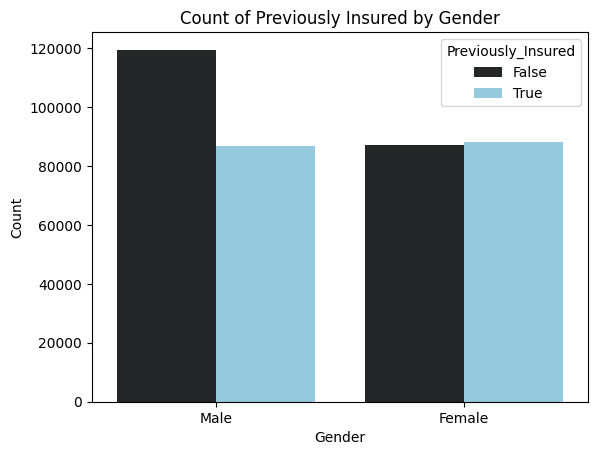

In [ ]:
sns.countplot(x="Gender", hue="Previously_Insured", data=df, color="skyblue")
plt.title("Count of Previously Insured by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [ ]:
# Changing previously_Insured values from bool(True/False) to str (Yes/No) for better representation
df['Previously_Insured'] = df['Previously_Insured'].replace({True: "Yes", False: "No"})

In [ ]:
insured_counts = df['Previously_Insured'].value_counts()
labels = insured_counts.index
colors = ['skyblue', 'salmon']

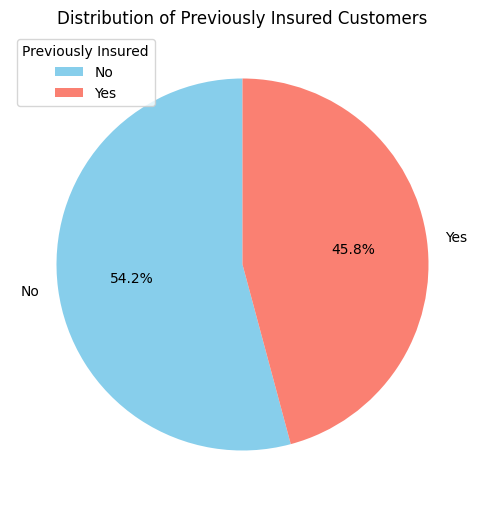

In [ ]:
plt.figure(figsize=(6, 10))
plt.pie(insured_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Previously Insured Customers')
plt.legend(title="Previously Insured")
plt.show()

### **Representation of Count of Vehicle Damage by their Age**

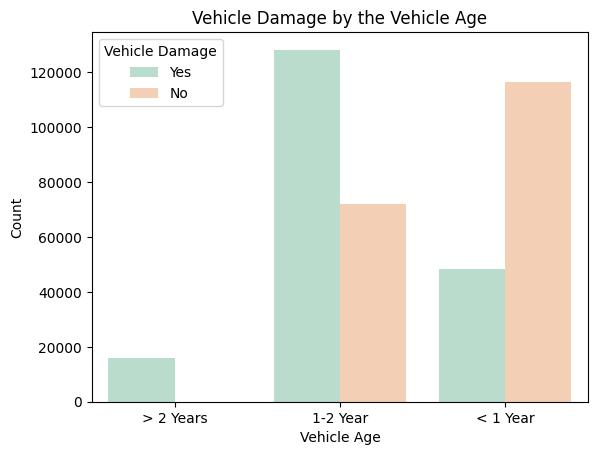

In [ ]:
sns.countplot(data=df, x='Vehicle_Age', hue='Vehicle_Damage', palette="Pastel2")
plt.title("Vehicle Damage by the Vehicle Age")
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Vehicle Damage')
plt.show()

# **Conclusion:** Key Insights from Data Exploration
- This notebook presented an initial exploration of the insurance dataset, focusing on understanding its structure, key characteristics, and relationships between variables. The primary goal was to gain insights that would inform subsequent modeling efforts.

- Here are the key takeaways from the analysis:

1. **Dataset Completeness & Size:** The dataset is substantial, containing 381,109 entries with no missing values across all columns. This eliminates the need for imputation strategies for missing data.

2. **Target Variable Imbalance (Response):** The most critical finding for modeling is the significant imbalance in the target variable, 'Response'. The descriptive analysis showed that only approximately 12.3% of customers provided a positive response (e.g., purchased insurance). This class imbalance must be addressed during model training to prevent models from being heavily biased towards the majority class ('No Response').

3. **Previously Insured Status is Key:** The correlation analysis revealed a moderate negative correlation (-0.34) between 'Previously_Insured' and 'Response'. This is a significant insight, suggesting that customers who were previously insured are less likely to respond positively to the new offer compared to those who were not previously insured (54.2% of the dataset).

4. Age and Sales Channel Relationship: 'Age' and 'Policy_Sales_Channel' showed the strongest numerical correlation (-0.58), indicating that older customers tend to be associated with different policy sales channels (potentially lower-numbered channels) than younger customers.

5. **Weak Linear Correlations:** Most other numerical features like 'Driving_License', 'Region_Code', 'Annual_Premium', and 'Vintage' showed relatively weak linear correlations with the target variable 'Response' and other features in the correlation matrix. While weak linear correlation doesn't rule out other types of relationships, it suggests these variables might have a less direct linear impact on response compared to 'Previously_Insured'.

6. **Annual Premium Trends:** The distribution of 'Annual_Premium' is wide, with potential outliers (as suggested by the maximum value compared to the mean/median). The line plot showed how average premium varies with age, peaking in middle age groups and showing high variability at older ages.

7. **Gender Distribution & Response:** While the dataset contains both males and females, the countplot shows that the significant class imbalance (more 'No' responses than 'Yes' responses) is present within both gender groups. The absolute counts differ between genders, but the propensity to respond appears similar in this initial view.

8. **Vehicle Damage by Age:** The countplot for 'Vehicle_Damage' by 'Vehicle_Age' categorizes the counts of damaged vs. undamaged vehicles across different age ranges. It's clear that vehicles aged 1-2 years are the most numerous in the dataset, and within all age groups, undamaged vehicles significantly outnumber damaged ones.


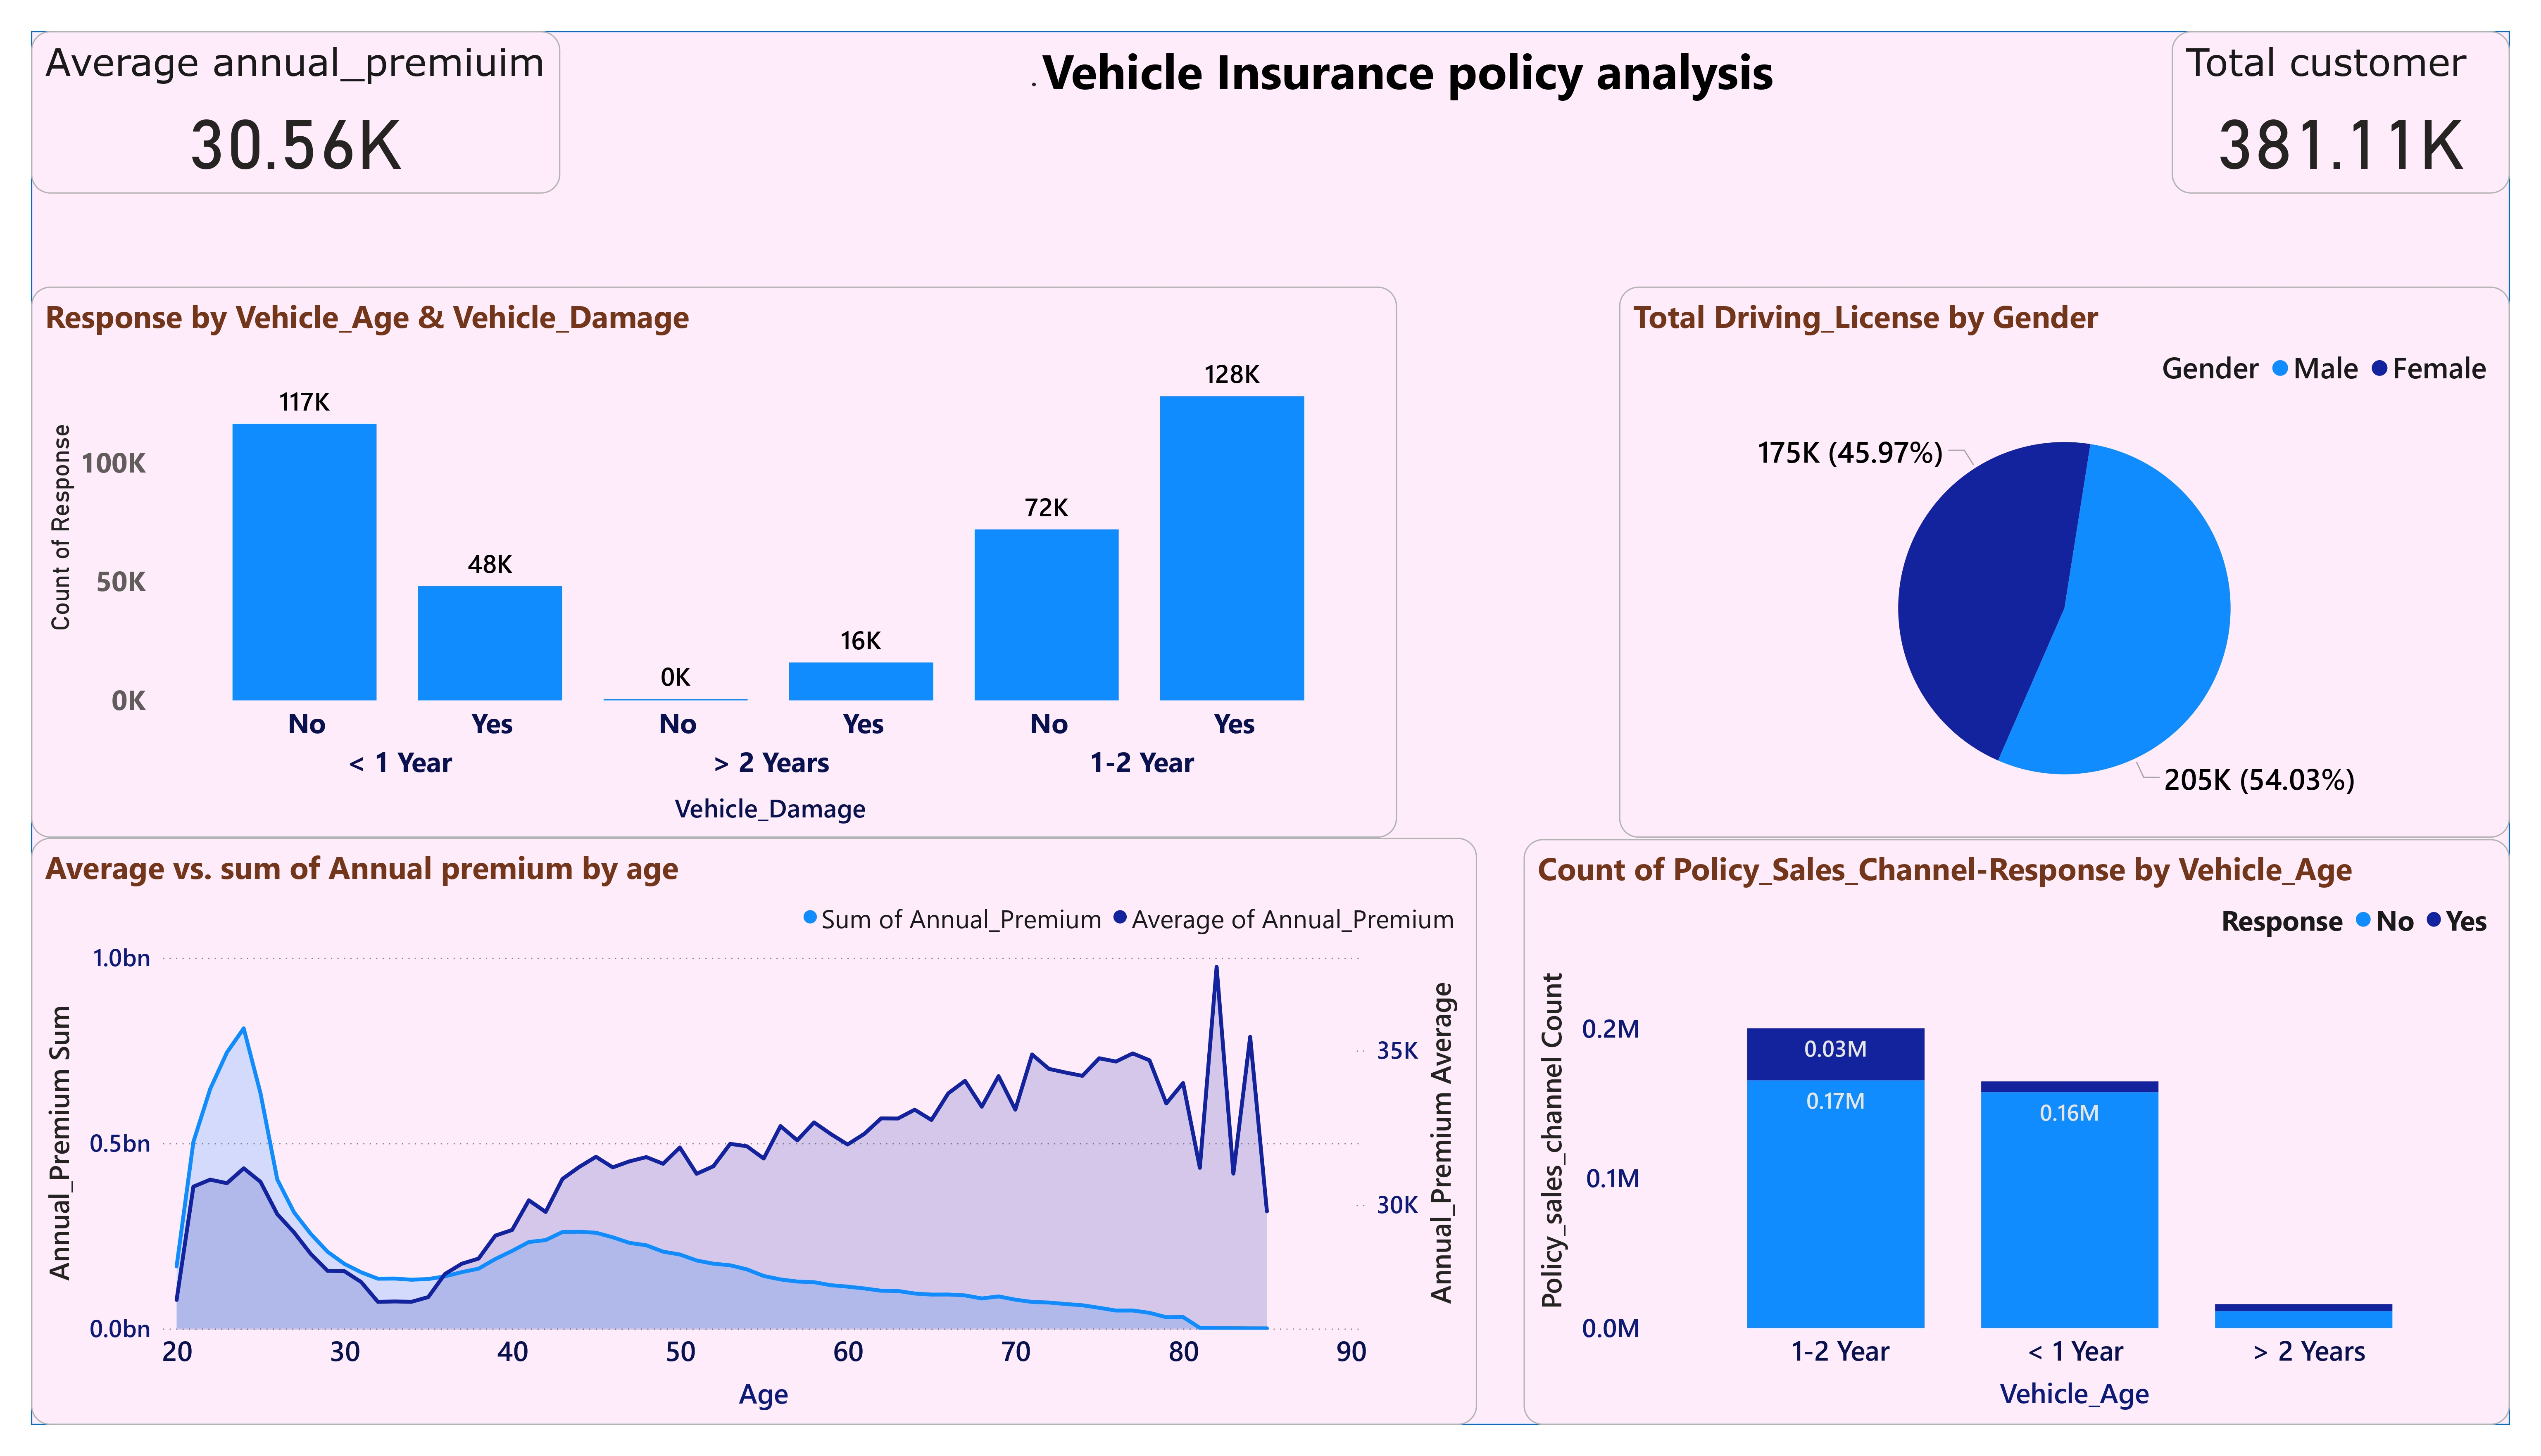

### Saving the data in local for dashboard creation

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# df.to_csv('/content/gdrive/MyDrive/cleaned_df_data_____2.csv', index=False)
